# Laborator 3 - regresia liniara

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [447]:

def load_dataset(file_name):
    """ 
    Reads the CSV file and forms the numpy matrix of m rows and n cols
    
    file_name (string): the name of the file
    
    returns: the dataset as a numpy matrix
    """
    # ... put your code here ...
    
    return x

In [448]:
def form_x_and_y(x):
    """
    From the given input matrix, construct the X and Y; Y is a single column
    
    x: the read matrix
    
    returns: a tuple x, y
    """
    # ... put your code here ...
    
    return x, y

In [470]:
def normalize(x):
    """
    From each element, subtract the minimum on its column, 
    then divide by the difference between its maximum and minimum (both
    on its column)
    
    x: the matrix X
    
    returns: the scaled matrix
    """
    # ... put your code here ...
    
    return x

In [450]:
def add_front_ones_column(x):
    """
    Changes the shape of X by adding a front column of ones.
    
    x: the matrix X
    
    returns: the transformed matrix
    """
    # ... put your code here ...
    
    return x

In [457]:
def sgd(x, y, theta):
    """
    Computes the second term, the derivative of J.
    
    returns: the vector of computed deltas
    """
    # ... put your code here ...
    return (...)

def predict(x, theta):
    """
    Constructs the inner product between X and theta.
    
    returns: a vector of predicted y values
    """
    # ... put your code here ...
    return (...)

def cost(x, y, theta):
    """
    The cost function J. Calls predict().
    
    returns: a scalar
    """
    # ... put your code here ...
    return (...)

def train(x, y, alpha = 0.01, iterations = 10000):
    """
    Iterates a specified number of times and adjusts thetas. Calls sgd() and cost().

    returns: the theta vector and the cost for each iteration, as vector
    
    """
    # ... put your code here ...
        
    return theta, values

In [458]:
# load the dataset
dataset = load_dataset('housing.csv')

# from the dataset read, construct the X and Y matrices
x, y = form_x_and_y(dataset)
assert np.shape(x)[0] == 506
assert np.shape(x)[1] == 13
assert np.shape(y)[0] == 506
assert np.shape(y)[1] == 1

# do the normalization
x = normalize(x)
assert np.all(np.logical_and(x >= 0, x <= 1))

# add columns of ones, taking initial and final shapes
initial_shape = np.shape(x)
x = add_front_ones_column(x)
final_shape = np.shape(x)

# check that the shape evolved the right way
assert np.all(np.array(initial_shape) + np.array([0, 1]) == np.array(final_shape))
assert np.all(x[:, 0] == 1)

Header is:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [474]:
# do the training
theta, values = train(x, y)

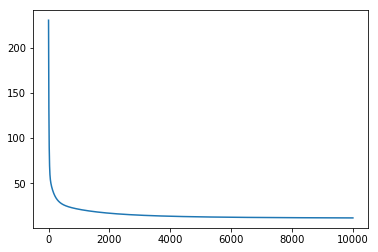

In [475]:
i = range(0, len(values))
plt.plot(i, values)
plt.show()

In [476]:
# compare with scikit implementation of regression 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(x, y)
y_pred = linreg.predict(x)

rss = sum((y_pred - y)**2)

assert(sum((predict(x, theta) - y)**2) - rss < 1e-1)

In [463]:
# directly compute theta using pseudoinverse
theta_direct = (... your code here ...)

In [477]:
# this method should give better predictions
assert(sum((predict(x, theta_direct) - y)**2) - rss < 1e-10)

In [479]:
m = np.shape(x)[0]
perm = ...
np.random.shuffle(perm)

# ... put your code here ...

x_train = ...
x_test = ...
y_train = ...
y_test = ...

# after splitting to 70/30, check to ensure that no data has been lost
# be sure to split both the X and the Y with the same permutation
assert tuple([sum(i) for i in zip(np.shape(x_train), np.shape(x_test))]) == (506, 28)
assert tuple([sum(i) for i in zip(np.shape(y_train), np.shape(y_test))]) == (506, 2)

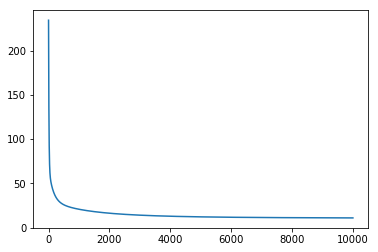

In [480]:
# compute again the thetas
theta, values = train(x_train, y_train)

i = range(0, len(values))
plt.plot(i, values)
plt.show()

In [482]:
# show the obtained costs
cost(x_train, y_train, theta), cost(x_test, y_test, theta)

(array([ 11.02072828]), array([ 13.65569439]))